In [4]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering4 import feature_engineering

df=pd.read_csv('../data/train.csv', sep=',')
df_test=pd.read_csv('../data/test.csv', sep=',')

df_d, df_d_test = feature_engineering(df, df_test)

features=['IsChild', 'Age_', 'Sex_', 'Pclass', 'Fare_', 'Title_s', 'Cabin_s', 'HasFamily', 'Embarked__C', 'Embarked__Q', 'Embarked__S']

df_d = df_d[features]
df_d_test = df_d_test[features]


In [5]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_d.columns
X_train = df_d
y_train = df['Survived']


In [7]:
df_d[df_d['IsChild']==1].head()

,IsChild,Age_,Sex_,Pclass,Fare_,Title_s,Cabin_s,HasFamily,Embarked__C,Embarked__Q,Embarked__S
7,1,2,0,3,21.0750,0.5,0.3,1,0,0,1
9,1,14,1,2,30.0708,0.8,0.3,1,1,0,0
10,1,4,1,3,16.7000,0.8,0.5,1,0,0,1
14,1,14,1,3,7.8542,0.8,0.3,0,0,0,1
16,1,2,0,3,29.1250,0.5,0.3,1,0,1,0


In [8]:
from sklearn.cross_validation import train_test_split
X, y = df_d.iloc[:].values, df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

######################################

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', KernelPCA(n_components=8, kernel='rbf', gamma=0.05)),
        #('clf', LogisticRegression(random_state=1))
        ('clf', KNeighborsClassifier(n_neighbors=7))
        #('clf', RandomForestClassifier(n_estimators=100,
                                      # criterion='entropy',
                                       #random_state=0,
                                       #max_depth=4,
                                       ##max_features=4,
                                       #n_jobs=-1))
    ])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.05, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=8,
     remove_zero_eig=False, tol=0)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'))])

In [9]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print accuracy_score(pipe.predict(X_test), y_test)
print accuracy_score(pipe.predict(X_train), y_train)
print precision_score(pipe.predict(X_test), y_test)
print f1_score(pipe.predict(X_test), y_test)

0.748603351955
0.851123595506
0.58904109589
0.656488549618


In [10]:
from sklearn import svm, cross_validation, datasets

X, y = df_d.iloc[:].values, df['Survived'].values

scores = cross_validation.cross_val_score(pipe, X, y, scoring='f1', cv=8)

print('F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

F1: 0.728 +/- 0.049


## Tuning hyperparameters via grid search

In [ ]:
from sklearn.grid_search import GridSearchCV

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', KernelPCA(kernel='rbf')),
        #('clf', LogisticRegression(random_state=1))
        ('clf', KNeighborsClassifier())
        #('clf', RandomForestClassifier(n_estimators=100,
                                      # criterion='entropy',
                                       #random_state=0,
                                       #max_depth=4,
                                       ##max_features=4,
                                       #n_jobs=-1))
    ])

pca_gamma_range = np.linspace(0.001, 0.1, 10)
pca_n_range = range(5,14)
knn_n_neighbor_range = range(4,10)

param_grid = [
    {'pca__n_components': pca_n_range,
     'pca__gamma': pca_gamma_range,
     'clf__n_neighbors': knn_n_neighbor_range
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=8,
                  n_jobs=-1)

gs = gs.fit(X, y)

print gs.best_score_

print gs.best_params_




In [ ]:
X.shape

In [ ]:
scores = cross_validation.cross_val_score(gs, X, y, scoring='f1', cv=5)
print('F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
scores

## SVM

In [11]:
from sklearn.grid_search import GridSearchCV

pipe = Pipeline([
        ('scaler', StandardScaler()),
        #('pca', KernelPCA(kernel='rbf')),
        #('clf', LogisticRegression(random_state=1))
        #('clf', KNeighborsClassifier())
        #('clf', RandomForestClassifier(n_estimators=100,
                                      # criterion='entropy',
                                       #random_state=0,
                                       #max_depth=4,
                                       ##max_features=4,
                                       #n_jobs=-1))
        ('clf', SVC(kernel='rbf', random_state=2))
    ])

pca_gamma_range = np.linspace(0.001, 0.1, 10)
pca_n_range = range(5,14)

clf_C_range = np.linspace(1, 5, 5)
clf_gamma_range = np.linspace(0.1,1, 5)

param_grid = [
    {
        #'pca__n_components': pca_n_range,
        #'pca__gamma': pca_gamma_range,
        'clf__C': clf_C_range,
        'clf__gamma': clf_gamma_range
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=8,
                  n_jobs=-1)

gs = gs.fit(X, y)

print gs.best_score_

print gs.best_params_


0.761567077225
{'clf__gamma': 0.55000000000000004, 'clf__C': 5.0}


In [ ]:
scores = cross_validation.cross_val_score(gs, X, y, scoring='f1', cv=10)
print('F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

## RandomRorest

In [19]:
from sklearn.grid_search import GridSearchCV

pipe = Pipeline([
        ('scaler', StandardScaler()),
        #('pca', KernelPCA(kernel='rbf')),
        #('clf', LogisticRegression(random_state=1))
        #('clf', KNeighborsClassifier())
        ('clf', RandomForestClassifier(n_estimators=2000,
                                       criterion='entropy',
                                       random_state=0,
                                       #max_depth=4,
                                      #max_features=4,
                                       n_jobs=-1))
    ])

pca_gamma_range = np.linspace(0.001, 0.1, 5)
pca_n_range = range(5,14)

clf_max_depth_range = range(10,11)
clf_max_features_range = range(9, 10)

param_grid = [
    {
        #'pca__n_components': pca_n_range,
     #'pca__gamma': pca_gamma_range,
     'clf__max_depth': clf_max_depth_range,
     'clf__max_features': clf_max_features_range
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=8,
                  n_jobs=-1)

gs = gs.fit(X, y)

print gs.best_score_

print gs.best_params_

0.79461981226
{'clf__max_features': 9, 'clf__max_depth': 10}


In [20]:
scores = cross_validation.cross_val_score(gs, X, y, scoring='f1', cv=10)
print('F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

F1: 0.801 +/- 0.061


In [21]:
scores = cross_validation.cross_val_score(gs, X, y, scoring='accuracy', cv=10)
print('Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Acc: 0.854 +/- 0.040


### A try: use simple RandomeRorest to make a prediction

In [25]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from featureEngineering4 import feature_engineering

df=pd.read_csv('../data/train.csv', sep=',')
df_test=pd.read_csv('../data/test.csv', sep=',')

df_d, df_d_test = feature_engineering(df, df_test)

features=['IsChild', 'Age_', 'Sex_', 'Pclass', 'Fare_', 'Title_s', 'Cabin_s', 'HasFamily', 'Embarked__C', 'Embarked__Q', 'Embarked__S']

df_d = df_d[features]
df_d_test = df_d_test[features]


forest = RandomForestClassifier(n_estimators=2000,
                                       criterion='entropy',
                                       random_state=0,
                                       max_depth=10,
                                       max_features=9,
                                       n_jobs=-1)
forest.fit(df_d, df['Survived'])

df_test['Survived'] = forest.predict(df_d_test)


(array([ 270.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  148.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

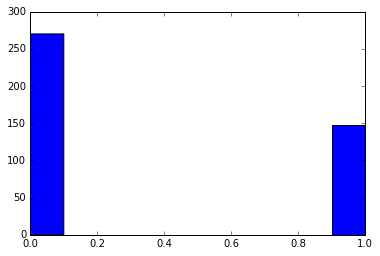

In [27]:
plt.hist(df_test['Survived'] )

In [29]:
import csv as csv
predictions_file = open("RandomForest-FE4-max_d=10-max_f=9.csv", "wb")
predictions_file_object = csv.writer(predictions_file)
predictions_file_object.writerow(["PassengerId", "Survived"])	# write the column headers
for index, row in df_test.iterrows():									# For each row in test file,
    predictions_file_object.writerow([row['PassengerId'], row['Survived']])			# write the PassengerId, and predict 1
predictions_file.close()